# Importing Libraries and Data Loading¶

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/GioElbert/indian-db/main/cancer.csv"
cancer_data = pd.read_csv(url)

# Data Understanding and Cleaning

In [3]:
# Checking for missing values and basic statistics

# Cek nilai yang hilang
cancer_data.isnull().sum()


# Menampilkan 5 baris pertama
cancer_data.describe()

# Informasi dataset
cancer_data.info()

# Menampilkan 5 baris pertama
cancer_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Handle missing values, if any
cancer_data = cancer_data.dropna()  # Example: drop rows with missing data

# Encode categorical features if present (e.g., diagnosis label)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cancer_data['diagnosis'] = label_encoder.fit_transform(cancer_data['diagnosis'])


# Exploratory Data Analysis (EDA) dan Preprocessing

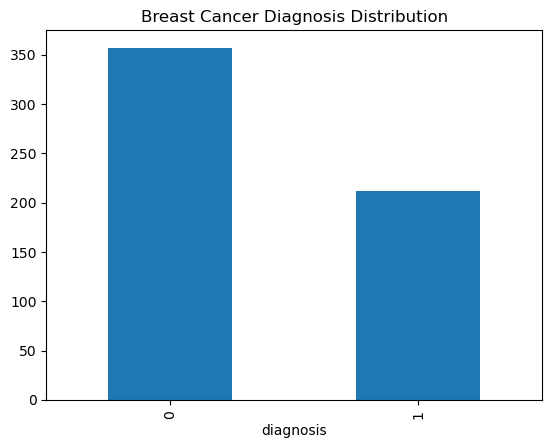

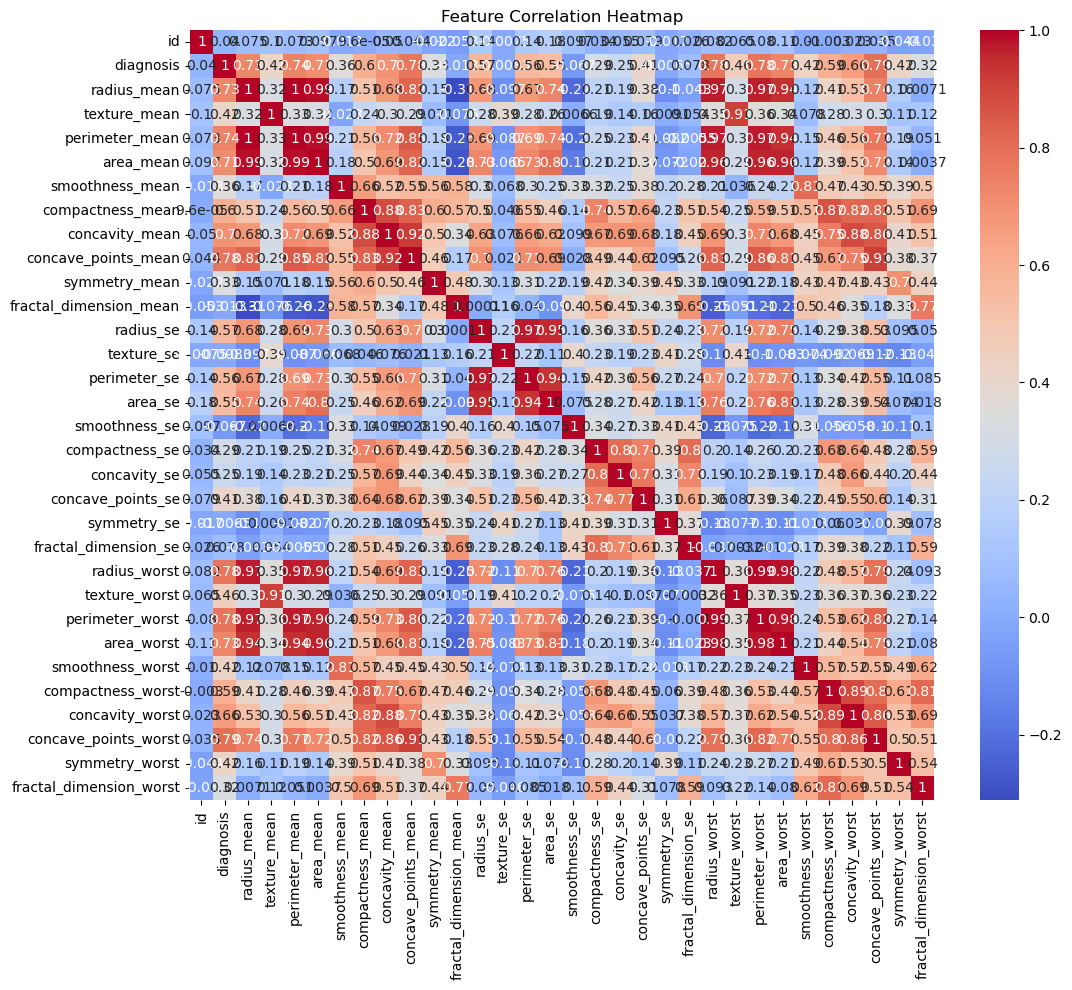

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable (e.g., Diagnosis)
cancer_data['diagnosis'].value_counts().plot(kind='bar')
plt.title('Breast Cancer Diagnosis Distribution')
plt.show()

# Correlation heatmap to visualize relationships among features
plt.figure(figsize=(12, 10))
sns.heatmap(cancer_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# Model Building and Evaluation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Additional Models: Random Forest and Logistic Regression
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Decision Tree Accuracy: 0.9239766081871345
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       108
           1       0.87      0.94      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171

Random Forest Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Logistic Regression Accuracy: 0.9590643274853801
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96    

# Conclusion

Based on the performance metrics of the three models tested—Decision Tree, Random Forest, and Logistic Regression—the following conclusions can be drawn:

Overall Performance: The Random Forest and Logistic Regression models both achieved higher accuracy (96.5% and 95.9%, respectively) compared to the Decision Tree model (92.4%). This suggests that Random Forest and Logistic Regression are generally better suited for this classification problem.

Precision and Recall:

For class 0, all models exhibit high precision and recall, with Random Forest and Logistic Regression performing slightly better.
For class 1, Random Forest and Logistic Regression also show high performance, with Random Forest achieving slightly higher precision and Logistic Regression showing high precision but slightly lower recall than Random Forest.
Best Model: The Random Forest model demonstrates the best balance across precision, recall, and F1-score, making it the top-performing model for this dataset. It provides a robust performance for both classes and generalizes well, as indicated by high scores across the board.

Conclusion: The Random Forest model is recommended as the optimal choice for this classification task due to its high accuracy, balanced precision and recall, and robust performance on both classes.